In [ ]:
import numpy as np

N = 10
n = 100

q = [ (np.exp(-(i-30)**2 / 100 ) + 2*np.exp(-(i-68)**2 / 100)) for i in range(1,101)]
q = np.array(q)
r = np.array([np.exp(-(i - 50)**2 / 100) for i in range(1,101)])

q = q/sum(q)
r = r/sum(r)


In [ ]:
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib import cm

garm_be_sard = cm.get_cmap('coolwarm')
colors = [garm_be_sard(i) for i in np.linspace(0, 0.9, N)]


<ipython-input-12-d2bacf825957>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  garm_be_sard = cm.get_cmap('coolwarm')


In [ ]:
functions = [
    lambda a,b : cp.sum_squares(a-b),
    lambda a,b : 2 -2*cp.sum([cp.geo_mean(cp.vstack([a[i], b[i]]))for i in range(n)]),
    lambda a,b : cp.max(cp.vstack([cp.abs(cp.sum(a[:i]-b[:i]))for i in range(1,n)]))
]


distributions for distance function Euclidian is:


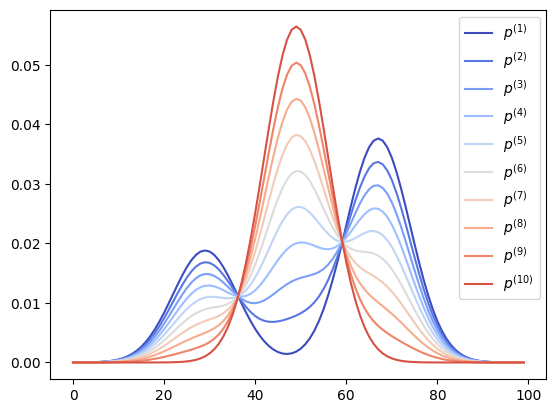

distributions for distance function Hellinger is:


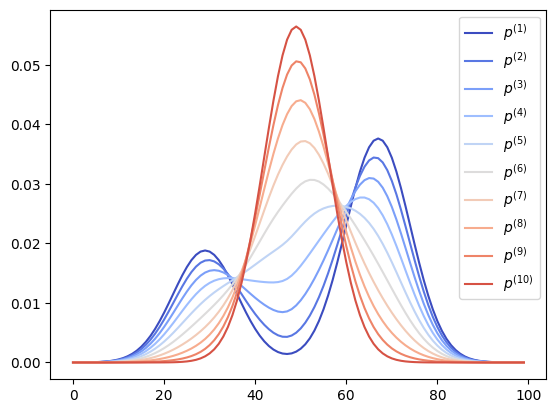

distributions for distance function Kolmogorov is:


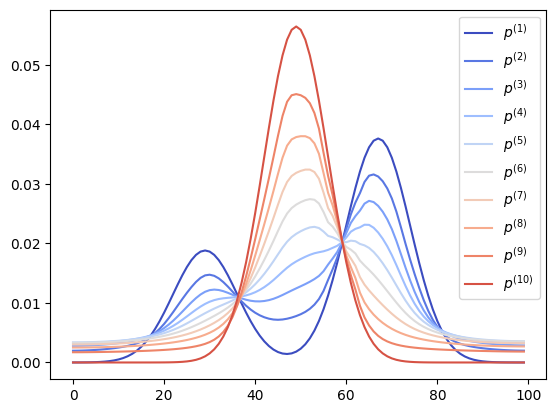

In [ ]:
g = ['Euclidian', 'Hellinger', 'Kolmogorov']
for count,f in enumerate(functions):
  p = cp.Variable((n,N), nonneg = True)
  objective = cp.Minimize(cp.sum([f(p[:,i], p[:,i+1]) for i in range(N-1)]))
  constraints = [p[:,0] == q, p[:, N-1] == r, p.T@np.ones(n) == np.ones(N)]
  problem = cp.Problem(objective, constraints)
  problem.solve(solver = 'ECOS')
  p = p.value
  print("distributions for distance function %s is:" %g[count])
  for i in range(N):
    plt.plot(p[:,i], label="$p^{(%d)}$"%(i+1), color = colors[i])
  plt.legend()
  plt.show()
